<a href="https://colab.research.google.com/github/gauravreddy08/deep-learning-tensorflow/blob/main/notebooks/03_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision in TensorFlow**

In this notebook, we will be building **Convolutional Neural Networks** from scratch. These type of Neural Networks are especially in case of **Computer Vision**.

## **Getting the Data Ready**
We will working on small dataset derived from [Kaggles Food101](https://www.kaggle.com/dansbecker/food-101) Dataset. 

In orginal Food101 Dataset there are total 101 food classes but the datset we are working with has only two classes namely `pizza` and `steak`.

```
# Example of file structure
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```
 



In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-20 16:27:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 142.250.110.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.50M  50.3MB/s    in 2.1s    

2021-05-20 16:27:36 (50.3 MB/s) - ‘pizza_steak.zip.2’ saved [109579078/109579078]



In [99]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [100]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are2 directories and 1 images in 'pizza_steak'.
There are2 directories and 1 images in 'pizza_steak/train'.
There are0 directories and 750 images in 'pizza_steak/train/steak'.
There are0 directories and 750 images in 'pizza_steak/train/pizza'.
There are2 directories and 1 images in 'pizza_steak/test'.
There are0 directories and 250 images in 'pizza_steak/test/steak'.
There are0 directories and 250 images in 'pizza_steak/test/pizza'.


In [101]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [102]:
class_names = ["pizza", "steak"]
class_names

['pizza', 'steak']

## **Visualizing our Dataset**

In [4]:
import matplotlib.image as mpimg
import random

def view_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img

Image Shape : (512, 382, 3)


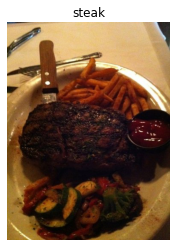

In [104]:
s = view_image("pizza_steak/train/", "steak")

In [105]:
s.shape

(512, 382, 3)

## **Preprocessing the Dataset**

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalizing our Data
training_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to out data directories

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import Data from directory and turn it to batches

train_data = training_datagen.flow_from_directory(directory=train_dir,
                                                  batch_size=32,
                                                  target_size=(224, 224),
                                                  class_mode = "binary",
                                                  seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## **Series of experiments to learn about CNN**

### **Building Model 1**

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

We'll go through each of the steps one-by-one later on in the notebook.

In [107]:
model_1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation='relu',
                            input_shape=(224, 224, 3)),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=2,
                                      padding='valid'),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.Conv2D(10, 3, activation='relu'),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")            
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_1 = model_1.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6740 - accuracy: 0.5462 - val_loss: 0.5894 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 11s 245ms/step - loss: 0.5428 - accuracy: 0.7660 - val_loss: 0.3714 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4159 - accuracy: 0.8158 - val_loss: 0.3193 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3796 - accuracy: 0.8277 - val_loss: 0.3566 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3649 - accuracy: 0.8516 - val_loss: 0.3116 - val_accuracy: 0.8560


In [108]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 28090)           

### **Building Model 2**

We will using th same dataset as we used before and trying to make  normal Neural Network instead of CNN and see how it works with our dataset. 

In [109]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 1.6038 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6934 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6928 - accuracy: 0.5208 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000


In [110]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite 20x more parameters than CNN `model_2` performs terribly

### **Building Model 3**

As previous model didn't work as expected lets improve that model by increasing number of neurons that go through the dataset.

In [111]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 6.0787 - accuracy: 0.5268 - val_loss: 0.6010 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.9965 - accuracy: 0.7013 - val_loss: 0.4915 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5781 - accuracy: 0.7616 - val_loss: 0.6168 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5643 - accuracy: 0.7595 - val_loss: 0.7325 - val_accuracy: 0.6520
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6195 - accuracy: 0.7339 - val_loss: 0.6947 - val_accuracy: 0.7080


In [112]:
model_3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Despite 500x more parameters than CNN, `model_3` still didn't out perform the CNN's `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## **Breaking down our CNN Model**
Whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### **Becoming one with the Data**

Image Shape : (512, 512, 3)
Image Shape : (512, 512, 3)


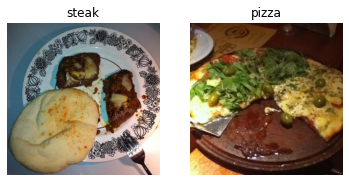

In [113]:
plt.figure()

plt.subplot(1, 2, 1)
steak_img = view_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_image("pizza_steak/train/", "pizza")

### **Preprocess the Data**




In [114]:
# Define directory dataset paths 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 


#### **Train and Test Data Generators**

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

#### **Normalizing the Data**

In [116]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary')

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [117]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [118]:
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

### **Creating a Baseline CNN Model**

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [120]:
# Baseline Model 

model_4 = Sequential([
      Conv2D(10, 3,  activation='relu', input_shape=(224, 224, 3)),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      Flatten(),
      Dense(1, activation='sigmoid')
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 253ms/step - loss: 1.6978 - accuracy: 0.6091 - val_loss: 0.4533 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4426 - accuracy: 0.8072 - val_loss: 0.4100 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3412 - accuracy: 0.8705 - val_loss: 0.3644 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.1634 - accuracy: 0.9445 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.0476 - accuracy: 0.9910 - val_loss: 0.4831 - val_accuracy: 0.8200


In [121]:
model_4.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_18 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

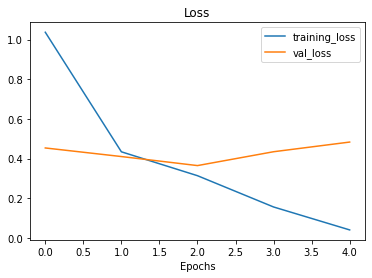

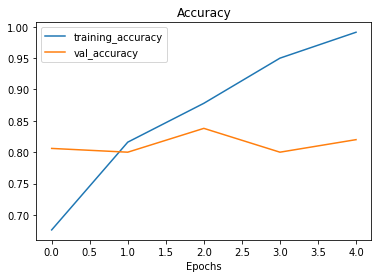

In [123]:
plot_loss_curves(history_4)

While the `accuracy` on training data increased gradually the test data did not show much difference. Same with the `loss` score

This is the case of **Overfitting**

## **Solving our Overfitting Problem**

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with **max pooling**
* A ConvNet with **max pooling** and **data augmentation**


### **Building Model 5**

Adding MaxPool2D layers to our baseline model : `model_4`

In [124]:
model_5 = Sequential([
    Conv2D(10, 3 , input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6844 - accuracy: 0.5235 - val_loss: 0.4739 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4976 - accuracy: 0.7704 - val_loss: 0.3937 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4197 - accuracy: 0.8133 - val_loss: 0.3718 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4033 - accuracy: 0.8263 - val_loss: 0.3331 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3660 - accuracy: 0.8402 - val_loss: 0.3829 - val_accuracy: 0.8180


In [125]:
model_5.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 6760)            

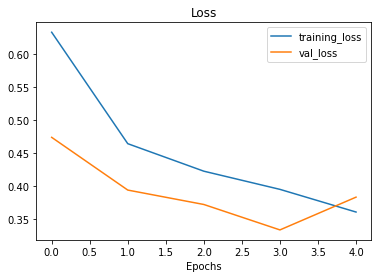

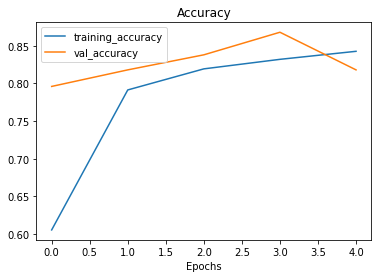

In [126]:
plot_loss_curves(history_5)

### **Augmenting our Data**

In [127]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, # rotate the image slightly
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) 

# Create ImageDataGenerator without Data Augmentation 

train_datagen = ImageDataGenerator(rescale=1/225)
test_datagen = ImageDataGenerator(rescale=1/225)

In [128]:
print("Augmented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=False)

print("Normal Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=False)

Augmented Data
Found 1500 images belonging to 2 classes.
Normal Data
Found 1500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


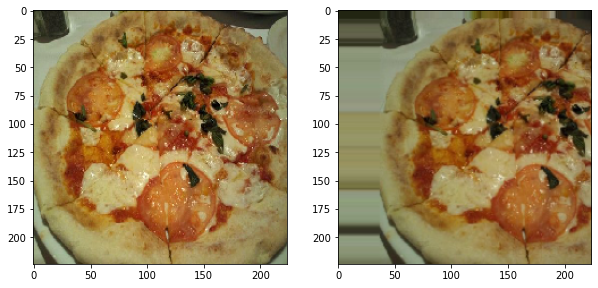

In [129]:
images, labels = train_data[0]
images1, labels1 = train_data_aug[0]

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.subplot(1, 2, 2)
plt.imshow(images1[0])

### **Building Model 6**
Adding MaxPool2D layers to the baseline model and also training on **Augmented Data** instead od normal data.

In [130]:
model_6 = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
        MaxPool2D(pool_size=2),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

model_6.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics='accuracy')

history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.7213 - accuracy: 0.3428 - val_loss: 0.6834 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6892 - accuracy: 0.6098 - val_loss: 0.6765 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6894 - accuracy: 0.5726 - val_loss: 0.6366 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6576 - accuracy: 0.6473 - val_loss: 0.5933 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6284 - accuracy: 0.7004 - val_loss: 0.4964 - val_accuracy: 0.8100


In [131]:
model_6.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6760)            

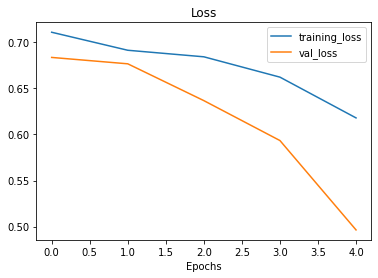

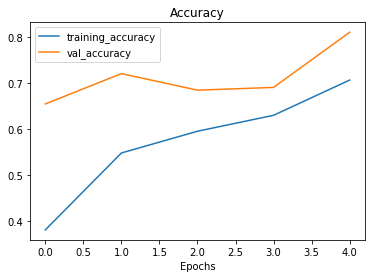

In [132]:
plot_loss_curves(history_6)

The `model_6` didn't give good results. It is because we havent shuffled the Dataset. Rectifying the error and trying again.

### **Building Model 7**
Shuffling the data and trying the `model_6` again

In [133]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='binary',
                                                       shuffle=True)

Found 1500 images belonging to 2 classes.


In [134]:
model_7 = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
        MaxPool2D(pool_size=2),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation='sigmoid')
])

model_7.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics='accuracy')

history_7 = model_7.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6671 - accuracy: 0.6205 - val_loss: 0.5140 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5609 - accuracy: 0.7094 - val_loss: 0.4189 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 25s 537ms/step - loss: 0.4976 - accuracy: 0.7617 - val_loss: 0.3527 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4683 - accuracy: 0.7778 - val_loss: 0.3463 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 25s 542ms/step - loss: 0.4976 - accuracy: 0.7613 - val_loss: 0.3648 - val_accuracy: 0.8440


In [135]:
model_7.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6760)            

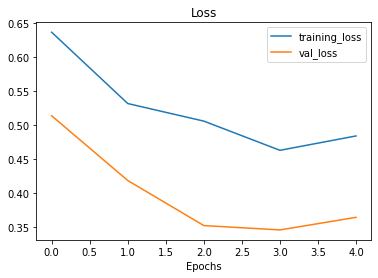

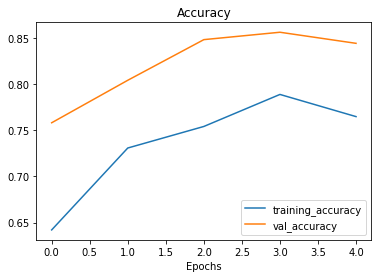

In [136]:
plot_loss_curves(history_7)

### **Building Model 8**
As `model_7` didn't perform well either, replicating the model used in [CNN Explainer](https://poloclub.github.io/cnn-explainer/) Website.

In [139]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 577ms/step - loss: 0.6915 - accuracy: 0.5785 - val_loss: 0.5048 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 27s 567ms/step - loss: 0.5870 - accuracy: 0.6963 - val_loss: 0.4411 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 27s 572ms/step - loss: 0.5354 - accuracy: 0.7558 - val_loss: 0.4919 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 27s 567ms/step - loss: 0.5372 - accuracy: 0.7441 - val_loss: 0.4409 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 27s 571ms/step - loss: 0.5443 - accuracy: 0.7198 - val_loss: 0.4170 - val_accuracy: 0.8460


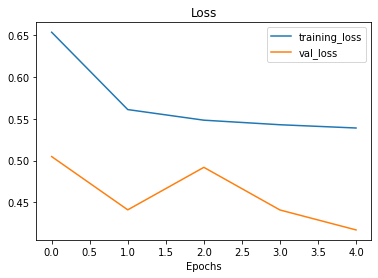

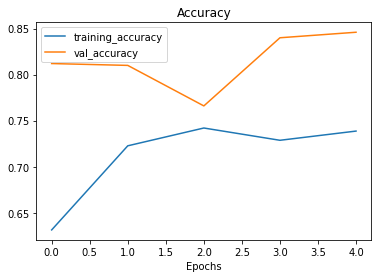

In [140]:
plot_loss_curves(history_8)

## **Making Predictions with our Model**

--2021-05-20 16:42:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2021-05-20 16:42:33 (21.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



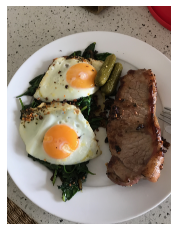

In [141]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [142]:
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [143]:
steak = load_prep_img("03-steak.jpeg")

In [144]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

In [145]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [146]:
def pred_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_prep_img(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img);
  plt.title(f"Prediction: {pred_class}");
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


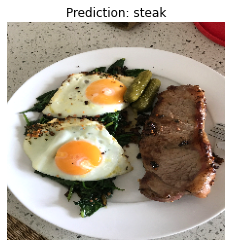

In [147]:
pred_plot(model_7, filename="03-steak.jpeg")

--2021-05-20 16:43:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-05-20 16:43:53 (63.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


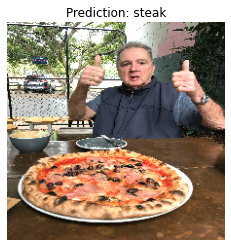

In [148]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_plot(model_7, "03-pizza-dad.jpeg", class_names)

# **Multi Class Classification**

Previously we have worked with 2 classes (Binary Classification). Lets switch it up a notch and work with 10 classes (Multi Class Classification)

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-20 17:16:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.187.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   185MB/s    in 2.7s    

2021-05-20 17:16:12 (185 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

## **Exploring our Data**

Image Shape : (512, 512, 3)


array([[[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [ 39,  38,  44],
        [ 37,  36,  44],
        [ 33,  32,  40]],

       [[  2,   3,   0],
        [  2,   3,   0],
        [  4,   5,   0],
        ...,
        [ 36,  35,  43],
        [ 34,  33,  41],
        [ 29,  28,  36]],

       [[  1,   2,   0],
        [  3,   4,   0],
        [  5,   6,   1],
        ...,
        [ 31,  31,  39],
        [ 30,  30,  38],
        [ 27,  27,  35]],

       ...,

       [[206, 148,  15],
        [206, 148,  15],
        [205, 147,  14],
        ...,
        [177,  91,  18],
        [168,  81,  10],
        [171,  84,  13]],

       [[213, 155,  22],
        [212, 154,  21],
        [213, 155,  22],
        ...,
        [175,  91,  18],
        [166,  82,  10],
        [169,  85,  13]],

       [[207, 150,  17],
        [204, 147,  14],
        [204, 147,  14],
        ...,
        [171,  87,  14],
        [165,  81,   9],
        [171,  87,  15]]

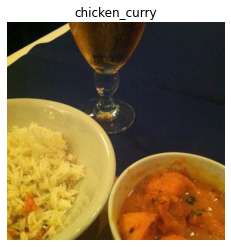

In [7]:
view_image("10_food_classes_all_data/train/", "chicken_curry")

In [8]:
import pathlib

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## **Preprocessing the Data**

In [9]:
# Define directory dataset paths 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [10]:
# Create Train and Test Data Generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [11]:
# Now that we rescaled (Normalise) now turn them into batchs

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224))

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## **Building  Model 9**

Similar to `model_8` but for multi-class data.

In [16]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [17]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 84s 229ms/step - loss: 2.2849 - accuracy: 0.1370 - val_loss: 2.0423 - val_accuracy: 0.2532
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 1.9635 - accuracy: 0.3194 - val_loss: 1.9811 - val_accuracy: 0.3016
Epoch 3/5
235/235 [==============================] - 54s 230ms/step - loss: 1.6421 - accuracy: 0.4372 - val_loss: 2.0218 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 54s 231ms/step - loss: 0.9575 - accuracy: 0.6877 - val_loss: 2.3499 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 54s 229ms/step - loss: 0.3616 - accuracy: 0.8997 - val_loss: 3.2688 - val_accuracy: 0.2912


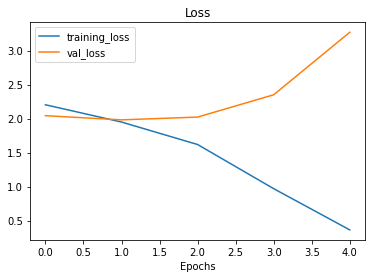

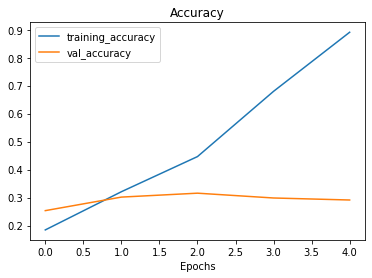

In [20]:
plot_loss_curves(history_9)

Its Overfitting again
## **Building Model 10**
Making the model little less complex and trying again.

In [21]:
model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [22]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 208ms/step - loss: 2.3020 - accuracy: 0.1650 - val_loss: 2.0175 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8266 - accuracy: 0.3761 - val_loss: 1.9977 - val_accuracy: 0.2776
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4072 - accuracy: 0.5467 - val_loss: 2.0625 - val_accuracy: 0.2964
Epoch 4/5
235/235 [==============================] - 49s 211ms/step - loss: 0.8831 - accuracy: 0.7346 - val_loss: 2.3587 - val_accuracy: 0.2808
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.4460 - accuracy: 0.8808 - val_loss: 2.9036 - val_accuracy: 0.2660


In [23]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

In [24]:
model_10.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

## **Data Augmentation**
Augmenting the Data and trying again

In [25]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.25,
                                       width_shift_range=0.25,
                                       height_shift_range=0.25,
                                       zoom_range=0.25,
                                       shear_range=0.25,
                                       horizontal_flip=True,
                                       vertical_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224))

Found 7500 images belonging to 10 classes.


In [26]:
model_11 = Sequential([
    Conv2D(5, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(3, 3, activation='relu'),
    Conv2D(3, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug)/4,
                          validation_data=test_data,
                          validation_steps=int(0.25*len(test_data)))

Epoch 1/5
58/58 [==============================] - 14s 224ms/step - loss: 2.3887 - accuracy: 0.1061 - val_loss: 2.2983 - val_accuracy: 0.1464
Epoch 2/5
58/58 [==============================] - 13s 225ms/step - loss: 2.2864 - accuracy: 0.1772 - val_loss: 2.2712 - val_accuracy: 0.1480
Epoch 3/5
58/58 [==============================] - 13s 219ms/step - loss: 2.2264 - accuracy: 0.1974 - val_loss: 2.2778 - val_accuracy: 0.1365
Epoch 4/5
58/58 [==============================] - 13s 219ms/step - loss: 2.0775 - accuracy: 0.2646 - val_loss: 2.1366 - val_accuracy: 0.2253
Epoch 5/5
58/58 [==============================] - 13s 227ms/step - loss: 1.8648 - accuracy: 0.3823 - val_loss: 2.2389 - val_accuracy: 0.2188


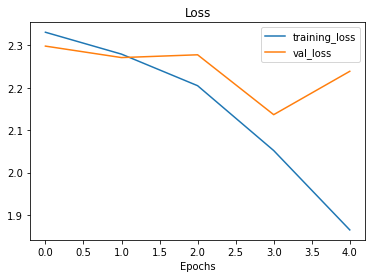

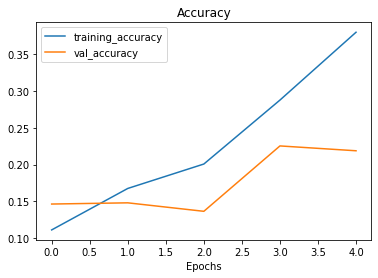

In [27]:
plot_loss_curves(history_11)

## **Saving and Loading back the model**

In [28]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [29]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.2447 - accuracy: 0.1916


[2.2446963787078857, 0.1915999948978424]

In [30]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 2.2447 - accuracy: 0.1916


[2.244696855545044, 0.1915999948978424]